In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

In [5]:
os.listdir('./digit-recognizer')

['test.csv', 'train.csv', 'sample_submission.csv']

In [64]:
train_path = './digit-recognizer/train.csv'
test_path = './digit-recognizer/test.csv'
sameple_path = './digit-recognizer/sample_submission.csv'

In [18]:
train_df = pd.read_csv(train_path)

In [19]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
label = train_df.pop('label')

In [22]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [25]:
train_data = train_df.to_numpy()

In [27]:
train_data[0].shape

(784,)

In [28]:
train_input, test_input, train_target, test_target = train_test_split(
    train_data, label, test_size = 0.2
)

In [29]:
train_input.shape, test_input.shape

((33600, 784), (8400, 784))

In [30]:
train_target.shape, test_target.shape

((33600,), (8400,))

In [32]:
import matplotlib.pyplot as plt

In [45]:
train_img = train_input[2].reshape(28,28)

In [48]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [50]:
model = Sequential()

In [51]:
model.add(layers.Flatten(input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
train_scaled = train_input/255.
test_scaled = test_input /255.

In [55]:
model.fit(train_scaled, train_target, epochs=10, batch_size = 32, validation_data=(test_input, test_target))

Epoch 1/10
1050/1050 [==============================] - 1s 879us/step - loss: 0.3260 - accuracy: 0.9074 - val_loss: 26.7849 - val_accuracy: 0.9413
Epoch 2/10
1050/1050 [==============================] - 1s 733us/step - loss: 0.1497 - accuracy: 0.9559 - val_loss: 20.4051 - val_accuracy: 0.9588
Epoch 3/10
1050/1050 [==============================] - 1s 776us/step - loss: 0.1013 - accuracy: 0.9701 - val_loss: 20.1866 - val_accuracy: 0.9599
Epoch 4/10
1050/1050 [==============================] - 1s 808us/step - loss: 0.0739 - accuracy: 0.9785 - val_loss: 17.9445 - val_accuracy: 0.9649
Epoch 5/10
1050/1050 [==============================] - 1s 743us/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 15.2766 - val_accuracy: 0.9710
Epoch 6/10
1050/1050 [==============================] - 1s 731us/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 17.7571 - val_accuracy: 0.9705
Epoch 7/10
1050/1050 [==============================] - 1s 732us/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 17

In [56]:
test_df = pd.read_csv(test_path)

In [57]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test_data = test_df.to_numpy()

In [60]:
test_data.shape

(28000, 784)

In [65]:
sample_df = pd.read_csv(sameple_path)

In [66]:
sample_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [67]:
sample_df['Label']

0        0
1        0
2        0
3        0
4        0
        ..
27995    0
27996    0
27997    0
27998    0
27999    0
Name: Label, Length: 28000, dtype: int64

In [72]:
test_data = test_data.reshape(-1, 784)

In [73]:
test_data.shape

(28000, 784)

In [83]:
prediction = model.predict_classes(test_data) #클래스 값으로 반환

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [84]:
prediction

array([2, 0, 9, ..., 3, 9, 2])

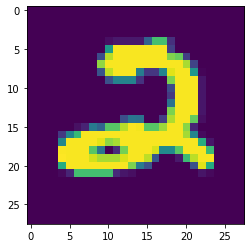

In [76]:
plt.imshow(test_data[0].reshape(28,28))

In [85]:
submission_df = pd.DataFrame({'ImageId' : list(range(1,len(prediction) + 1)),
                             'Label' : prediction})
submission_df.to_csv('sample_submission.csv', index=False, header=True)

In [86]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
